In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from matplotlib.font_manager import FontProperties as FP

#Set ffmpeg location
plt.rcParams['animation.ffmpeg_path'] = '../ffmpeg/bin/ffmpeg.exe'

#Set fig size
plt.rcParams['figure.figsize'] = (20,12)

#Set font globally
plt.rcParams['font.family'] = ['fantasy']

#Setup font variable for individual object
font = FP(fname="../Font/SimHei.ttf")

#Set style
plt.style.use('ggplot')

In [2]:
#Read File
df = pd.read_excel("../Data/CPI_by_type.xlsx")
df

,統計期,一.食物類,二.衣著類,三.居住類,四.交通及通訊類,五.醫藥保健類,六.教養娛樂類,七.雜項類
0,77年1月,41.88,91.92,65.46,80.08,51.08,51.47,56.11
1,77年2月,41.46,89.50,65.51,80.30,50.98,51.44,57.04
2,77年3月,41.03,87.35,65.56,80.36,50.96,51.49,56.41
3,77年4月,41.10,87.34,65.60,80.12,51.12,51.42,56.93
4,77年5月,42.13,88.53,65.73,80.11,51.05,51.40,57.71
...,...,...,...,...,...,...,...,...
426,112年7月,108.17,102.78,105.18,104.34,103.88,104.43,103.69
427,112年8月,110.17,101.16,105.32,105.37,103.83,104.32,103.67
428,112年9月,112.36,100.56,105.51,105.36,104.29,104.19,104.30
429,112年10月,113.34,108.88,104.54,104.81,104.49,104.99,103.66


In [3]:
x = df['統計期']
y1 = df['一.食物類']
y2 = df['二.衣著類']
y3 = df['三.居住類']
y4 = df['四.交通及通訊類']
y5 = df['五.醫藥保健類']
y6 = df['六.教養娛樂類']
y7 = df['七.雜項類']

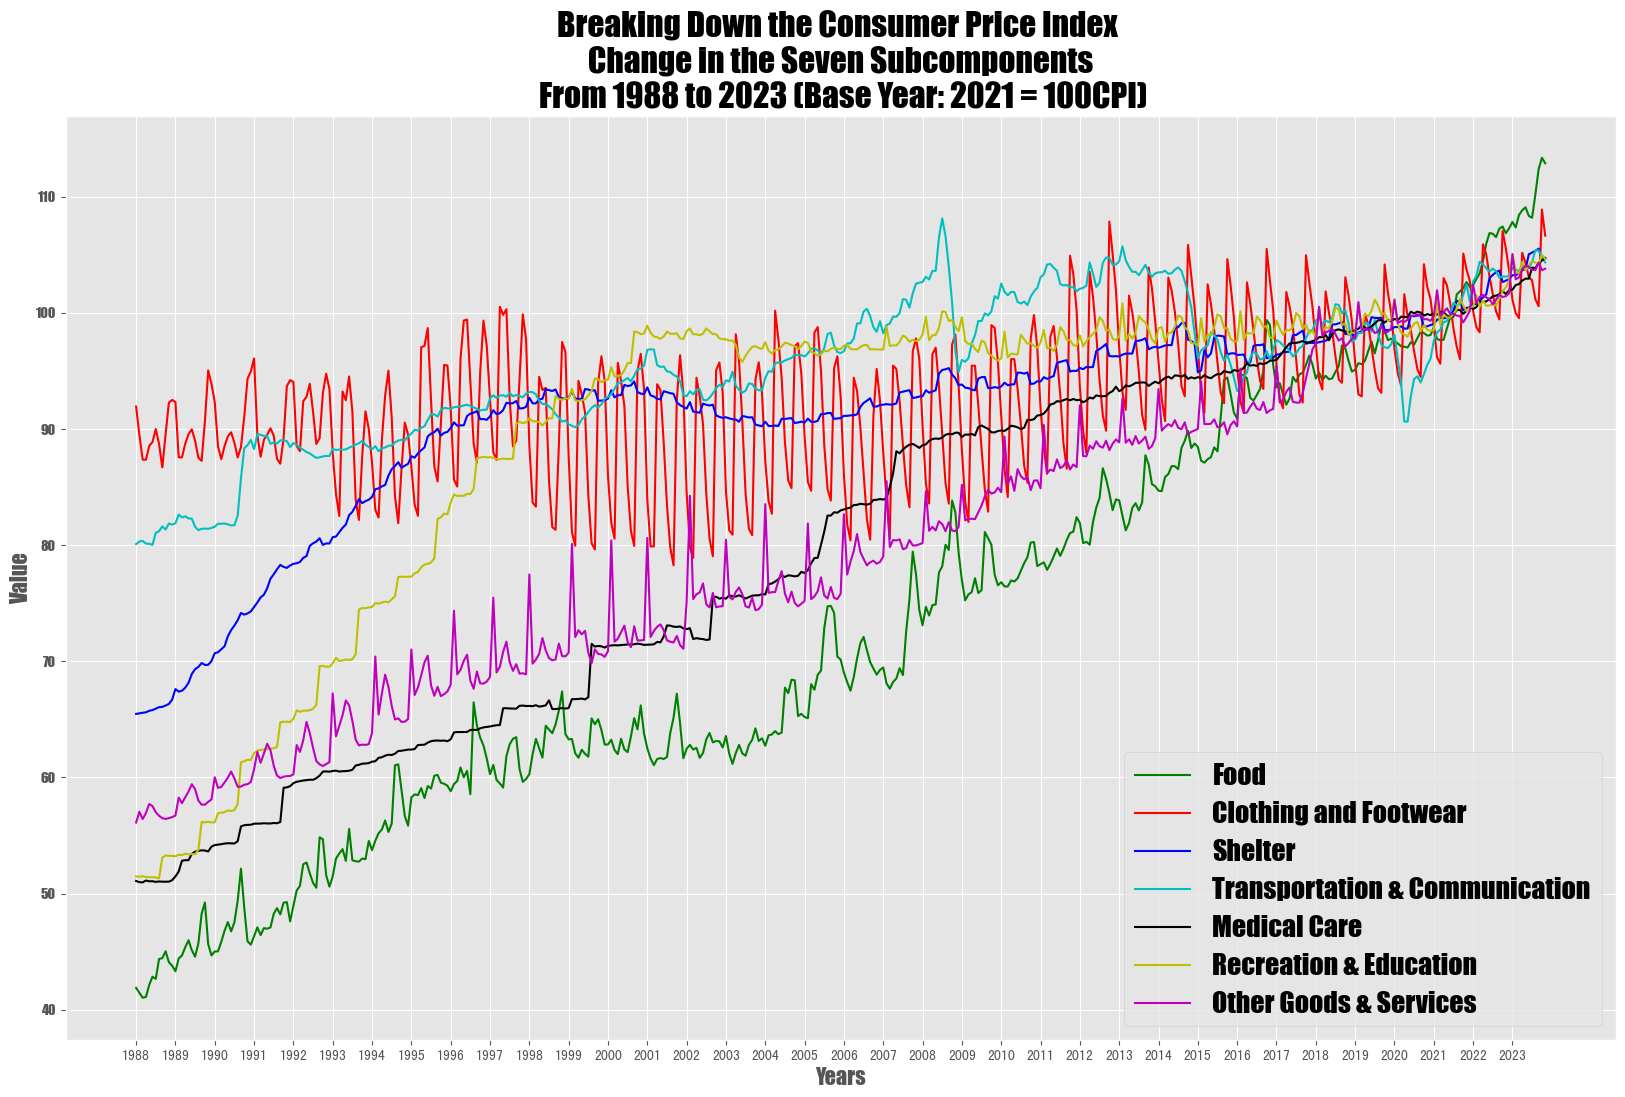

In [8]:
fig, ax = plt.subplots()

#Set custom label for x axis
values = [ n*12 for n in range(0,36)] #[0,12,24]
test_X = [ str(year) for year in range(1988,2024) ]
plt.xticks(values,test_X,fontsize=12, fontproperties=font )

#Set title and labels 
plt.title("Breaking Down the Consumer Price Index \n Change in the Seven Subcomponents \n From 1988 to 2023 (Base Year: 2021 = 100CPI)", fontsize=24)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Value", fontsize=16)

#Set line skin
line_1, = ax.plot(x.values, y1.values, 'g-', label = 'Food')
line_2, = ax.plot(x.values, y2.values, 'r-', label = 'Clothing and Footwear')
line_3, = ax.plot(x.values, y3.values, 'b-', label = 'Shelter')
line_4, = ax.plot(x.values, y4.values, 'c-', label = 'Transportation & Communication')
line_5, = ax.plot(x.values, y5.values, 'k-', label = 'Medical Care')
line_6, = ax.plot(x.values, y6.values, 'y-', label = 'Recreation & Education')
line_7, = ax.plot(x.values, y7.values, 'm-', label = 'Other Goods & Services')

#Set legend
plt.legend(loc='lower right', prop={'size': 20} , bbox_to_anchor=(1,0))

def animate(i):
    
    # update the data.
    line_1.set_data(x.values[:i], y1.values[:i])  
    line_2.set_data(x.values[:i], y2.values[:i])  
    line_3.set_data(x.values[:i], y3.values[:i])  
    line_4.set_data(x.values[:i], y4.values[:i])  
    line_5.set_data(x.values[:i], y5.values[:i])  
    line_6.set_data(x.values[:i], y6.values[:i])  
    line_7.set_data(x.values[:i], y7.values[:i])  

    return line_1, line_2, line_3, line_4, line_5, line_6, line_7

ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=500) 
    #save_count default is 100 frames; Without specifying this parameter, only first 100 rows will be draw in the animation video

ani.save("../Output/Animation/CPI_Subcomponent.mp4")
ani.save("../Output/Animation/JPG/CPI_Subcomponent.gif")

plt.show()